In [861]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

In [862]:
# df_train = pd.read_csv('../plate/data/history2013_2017.csv')
df_train = pd.read_csv('../plate/data/history_with_warning.csv')

df_train = df_train
df_train

,time,time_weight,time_modified,total_num,last_month,warning,population,lowest,average
0,1,1.0,2.0,8000,0,37800,18975,37800,38311
1,2,1.0,3.0,7500,0,38311,18810,38300,38620
2,3,1.0,4.0,8000,-1,38466,17704,39600,39882
3,4,1.0,5.0,8500,-1,38938,17313,41000,41637
4,5,1.0,6.0,8500,-1,40046,16324,41900,42262
5,6,1.0,7.0,9200,-1,41260,16252,39200,40380
6,7,1.0,8.0,9000,1,41426,13389,38400,39362
7,8,1.0,9.0,9000,1,40668,16855,39800,40169
8,9,1.0,10.0,9000,-1,39970,15198,41800,42180
9,10,1.0,11.0,9000,-1,40570,14941,43000,43271


/Users/Chi/.pyenv/versions/3.4.3/lib/python3.4/site-packages/seaborn/palettes.py:725: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  pal = _ColorPalette(pal(np.linspace(0, 1, n_colors)))
/Users/Chi/.pyenv/versions/3.4.3/lib/python3.4/site-packages/seaborn/palettes.py:725: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  pal = _ColorPalette(pal(np.linspace(0, 1, n_colors)))
/Users/Chi/.pyenv/versions/3.4.3/lib/python3.4/site-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/Users/Chi/.pyenv/versions/3.4.3/lib/python3.4/site-packages/seaborn/matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


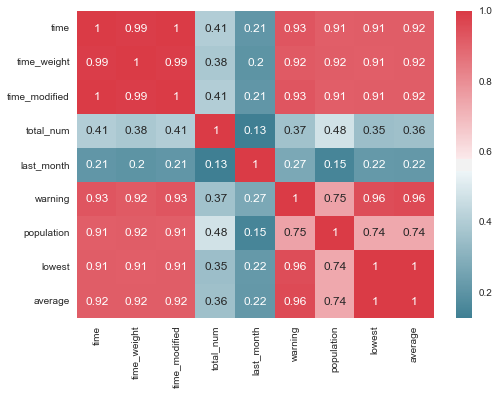

In [863]:
corr = df_train[df_train.columns].corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, annot=True)
plt.show()

In [864]:
x_features = pd.DataFrame(data=df_train, columns=['time_modified', 'total_num', 'warning', 'population'])
x_features

,time_modified,total_num,warning,population
0,2.0,8000,37800,18975
1,3.0,7500,38311,18810
2,4.0,8000,38466,17704
3,5.0,8500,38938,17313
4,6.0,8500,40046,16324
5,7.0,9200,41260,16252
6,8.0,9000,41426,13389
7,9.0,9000,40668,16855
8,10.0,9000,39970,15198
9,11.0,9000,40570,14941


In [865]:
y = df_train.iloc[:,8]
y.head(4)

0    38311
1    38620
2    39882
3    41637
Name: average, dtype: int64

# Standard scaling

In [866]:
scaler = StandardScaler()
x_features = scaler.fit_transform(x_features)
x_features

array([[ -1.71151604e+00,  -7.25740537e-01,  -1.70780737e+00,
         -8.65544653e-01],
       [ -1.67375987e+00,  -1.08929797e+00,  -1.67867993e+00,
         -8.67362918e-01],
       [ -1.63600371e+00,  -7.25740537e-01,  -1.66984480e+00,
         -8.79550805e-01],
       [ -1.59824754e+00,  -3.62183105e-01,  -1.64294039e+00,
         -8.83859543e-01],
       [ -1.56049137e+00,  -3.62183105e-01,  -1.57978343e+00,
         -8.94758115e-01],
       [ -1.52273521e+00,   1.46797300e-01,  -1.51058437e+00,
         -8.95551540e-01],
       [ -1.48497904e+00,   1.37432700e-03,  -1.50112223e+00,
         -9.27101198e-01],
       [ -1.44722288e+00,   1.37432700e-03,  -1.54432889e+00,
         -8.88906607e-01],
       [ -1.40946671e+00,   1.37432700e-03,  -1.58411549e+00,
         -9.07166398e-01],
       [ -1.37171055e+00,   1.37432700e-03,  -1.54991497e+00,
         -9.09998484e-01],
       [ -1.33395438e+00,  -3.62183105e-01,  -1.47564284e+00,
         -9.26660406e-01],
       [ -1.29619821e

In [870]:
latest = -4
x_train, x_test, y_train, y_test = train_test_split(x_features[:latest], y[:latest], 
            test_size=0.25, random_state=33)
x7 = x_features[latest:]
y7 = y[latest:]
(x7, y7)

(array([[ 1.5996997 ,  0.95825749,  1.19176975,  1.90286893],
        [ 1.63745587,  0.95534903,  1.22916232,  1.61802941],
        [ 1.67521203,  0.96480152,  1.25988579,  1.89176099],
        [ 1.7129682 ,  1.13421929,  1.30548648,  1.74733562]]), 87    90209
 88    89532
 89    92250
 90    90000
 Name: average, dtype: int64)

# Models

In [871]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression  
from sklearn.linear_model import Ridge
from sklearn.ensemble     import GradientBoostingRegressor
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import BayesianRidge

models = []

models.append(('LinearRegressor : ', LinearRegression()))
# models.append(('Logistic        : ', LogisticRegression()))
models.append(('Ridge           : ', Ridge()))
# models.append(('GradientBoosting: ', GradientBoostingRegressor()))
models.append(('ARDRegression   : ', ARDRegression()))
models.append(('BayesianRidge   : ', BayesianRidge()))

print('Models appended...')

Models appended...


# Results

In [872]:
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score

results = []
names = []
for name, model in models:
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    
    # evaluate
    print(name, end='--')
    print(r2_score(y_test, y_predict), end='--')
    y7_predict = model.predict(x7)
    y7_predict = list(map(lambda i: int(i), y7_predict))
    print(y7_predict)
    results.append(y7_predict)

print('---------average---------')
def add(a, b):
    for i in range(len(a)):
        a[i] += b[i]
        
map(add, results)

average = results[0]

for i in range(len(results) - 1):
    for j in range(len(average)):
        average[j] += results[i + 1][j]
average = list(map(lambda d: int(d / len(results)), average))
        
print(average)
print('---------reality---------')
print(y7)


LinearRegressor : --0.978003139215--[90029, 92336, 91642, 93405]
Ridge           : --0.98288364658--[90141, 91857, 91592, 93004]
ARDRegression   : --0.981334765849--[89803, 90434, 90961, 91718]
BayesianRidge   : --0.981363355249--[90071, 92003, 91582, 93122]
---------average---------
[90011, 91657, 91444, 92812]
---------reality---------
87    90209
88    89532
89    92250
90    90000
Name: average, dtype: int64


# XGBoost

In [873]:
import xgboost as xgb

# transform
x_valid = x_test
y_valid = y_test
x_test = x7

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
d_test = xgb.DMatrix(x_test)

params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 4

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

clf = xgb.train(params, d_train, 1000, watchlist, early_stopping_rounds=50, feval=xgb_r2_score, maximize=True, verbose_eval=10)

p_test = clf.predict(d_test)

sub = pd.DataFrame()
sub['y'] = p_test
sub.head()
print(p_test)
print('---------reality---------')
print(y7)

[0]	train-rmse:67705.5	valid-rmse:71721.2	train-r2:-14.1568	valid-r2:-17.4908
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[10]	train-rmse:55760.4	valid-rmse:59035.6	train-r2:-9.28039	valid-r2:-11.5282
[20]	train-rmse:45959.7	valid-rmse:48621.7	train-r2:-5.98413	valid-r2:-7.49805
[30]	train-rmse:37914.9	valid-rmse:40138.3	train-r2:-3.75311	valid-r2:-4.79131
[40]	train-rmse:31306.8	valid-rmse:33227.8	train-r2:-2.24068	valid-r2:-2.96884
[50]	train-rmse:25888.1	valid-rmse:27560.2	train-r2:-1.21595	valid-r2:-1.73038
[60]	train-rmse:21448.8	valid-rmse:22903.1	train-r2:-0.521119	valid-r2:-0.885602
[70]	train-rmse:17807	valid-rmse:19006.3	train-r2:-0.048427	valid-r2:-0.298545
[80]	train-rmse:14813.9	valid-rmse:15814.3	train-r2:0.274398	valid-r2:0.101001
[90]	train-rmse:12351.3	valid-rmse:13169.6	train-r2:0.495589	valid-r2:0.376546
[100]	train-rmse:10332.6	valid-rmse:10971.1	train-r2:0.646998	valid-

[ 86086.8046875  88163.71875    86086.8046875  87910.9296875]
---------reality---------
87    90209
88    89532
89    92250
90    90000
Name: average, dtype: int64
